In [1]:
!pip install numpy pandas tensorflow scikit-learn

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional


Load the dataset

In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("lakshmi25npathi/imdb-dataset-of-50k-movie-reviews")

print("Path to dataset files:", path)

100%|██████████| 25.7M/25.7M [00:00<00:00, 107MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews/versions/1


In [7]:
!mv /root/.cache/kagglehub/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews/versions/1 /content/imdb_dataset

In [8]:
data = pd.read_csv('/content/imdb_dataset/IMDB Dataset.csv')
reviews = data['review'].values
sentiment = data['sentiment'].map({'positive': 1, 'negative': 0}).values

Preprocess the data

In [9]:
X_train, X_test, y_train, y_test = train_test_split(reviews, sentiment, test_size=0.2, random_state=42)

In [10]:
max_word = 10000
max_len = 200
tokenizer = Tokenizer(num_words=max_word, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

X_train_pad = pad_sequences(X_train_seq, maxlen=max_len, padding='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len, padding='post')

Build the RNN

In [11]:
model = Sequential([
    Embedding(input_dim=max_word, output_dim=128, input_length=max_len),
    Bidirectional(LSTM(64, return_sequences=False)),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Compile the model

In [12]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [13]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Train the model

In [14]:
history = model.fit(
    X_train_pad, y_train,
    validation_split=0.2,
    epochs=10,
    batch_size=32,
    verbose=2
)

Epoch 1/10
1000/1000 - 260s - 260ms/step - accuracy: 0.7498 - loss: 0.5106 - val_accuracy: 0.8556 - val_loss: 0.3478
Epoch 2/10
1000/1000 - 257s - 257ms/step - accuracy: 0.8913 - loss: 0.2864 - val_accuracy: 0.8794 - val_loss: 0.2866
Epoch 3/10
1000/1000 - 264s - 264ms/step - accuracy: 0.9252 - loss: 0.2082 - val_accuracy: 0.8836 - val_loss: 0.3048
Epoch 4/10
1000/1000 - 251s - 251ms/step - accuracy: 0.9478 - loss: 0.1528 - val_accuracy: 0.8737 - val_loss: 0.3374
Epoch 5/10
1000/1000 - 261s - 261ms/step - accuracy: 0.9642 - loss: 0.1065 - val_accuracy: 0.8791 - val_loss: 0.4228
Epoch 6/10
1000/1000 - 264s - 264ms/step - accuracy: 0.9683 - loss: 0.0954 - val_accuracy: 0.8792 - val_loss: 0.4614
Epoch 7/10
1000/1000 - 260s - 260ms/step - accuracy: 0.9752 - loss: 0.0756 - val_accuracy: 0.8696 - val_loss: 0.4549
Epoch 8/10
1000/1000 - 265s - 265ms/step - accuracy: 0.9751 - loss: 0.0748 - val_accuracy: 0.8620 - val_loss: 0.5749
Epoch 9/10
1000/1000 - 251s - 251ms/step - accuracy: 0.9878 - lo

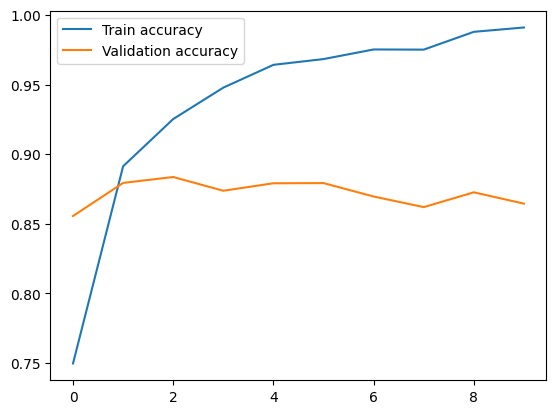

In [15]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.legend()
plt.show()

In [16]:
from re import VERBOSE
test_loss, test_acc = model.evaluate(X_test_pad, y_test, verbose=2)
print('Test accuracy:', test_acc)

313/313 - 19s - 60ms/step - accuracy: 0.8597 - loss: 0.6194
Test accuracy: 0.8597000241279602


In [17]:
model.save('imdb_rnn_model.h5')